In [4]:
# File: 03_sql_analysis.ipynb
# Purpose: Run SQL queries via SQLAlchemy and visualize the results


import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [10]:
# Create SQLAlchemy engine
conn = pyodbc.connect(
    r'DRIVER=ODBC Driver 17 for SQL Server;'
    r'SERVER=localhost\SQLEXPRESS;'
    r'DATABASE=AirbnbNYC;'
    r'Trusted_Connection=yes;',
)

query = '''
SELECT neighbourhood_group, AVG(price) AS avg_price
FROM airbnb_cleaned
GROUP BY neighbourhood_group
'''

df = pd.read_sql(query, conn)
print(df)
conn.close()


  neighbourhood_group   avg_price
0            Brooklyn  626.487435
1               Bronx  629.005024
2           Manhattan  622.725472
3       Staten Island  621.019748
4              Queens  629.639438


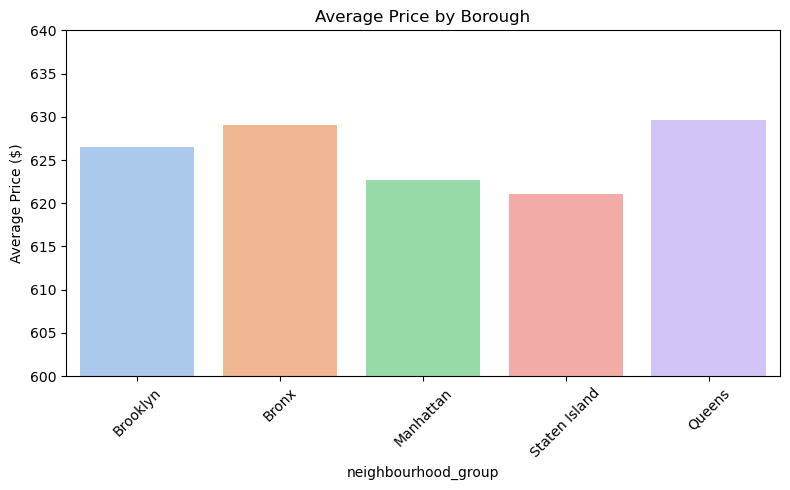

In [20]:
# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='neighbourhood_group', y='avg_price', hue='neighbourhood_group', palette='pastel', legend=False)
plt.title('Average Price by Borough')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.ylim(600, 640)
plt.tight_layout()

# Save to correct folder
plt.savefig('sqlalchemy_avg_price_by_borough.png')
plt.show()